# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Import Preprocessed Data

In [2]:
loan_data_preprocessed_backup = pd.read_csv(r'C:\Users\温泉小鱼汤\Documents\BaiduNetdiskWorkspace\USC\Credit Risk Modeling\loan_data_preprocessed.csv')

C:\Users\温泉小鱼汤\AppData\Local\Temp\ipykernel_10616\1604220324.py:1: DtypeWarning: Columns (20,48,56,113,124,125,126,129,130,131,134,140,141,142) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_preprocessed_backup = pd.read_csv(r'C:\Users\温泉小鱼汤\Documents\BaiduNetdiskWorkspace\USC\Credit Risk Modeling\loan_data_preprocessed.csv')


# Explore Data

In [3]:
loan_data_preprocessed = loan_data_preprocessed_backup.copy()

To build models for LGD and EAD, we only consider loans that are written off (ie. borrowers had enough time to repay part of their remaining debt).

In [4]:
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off',
                                            'Does not meet the credit policy. Status:Charged Off'])]

In [5]:
loan_data_defaults.shape

(262416, 279)

In [6]:
pd.options.display.max_rows = None

In [7]:
loan_data_defaults.isnull().sum()

Unnamed: 0                                                              0
id                                                                 262416
member_id                                                          262416
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           21743
emp_length                                                          20409
home_ownership                        

In [8]:
pd.options.display.max_rows = 100

# Notes on Model Differences

Unlike the PD model, LGD and EAD models are not required to be easy to comprehend since only risk modelers use them. 

Hence, the independent variables need not to be solely dummies. 

We won't care about the WoE or any other criteria to group the categories. For continuous variables we can transform them.

Either way, there is no need for fine classing or coarse classing.

# Independent Variables

## Impute missing values

In the PD model we created Missing categories for missing values. Here we impute them with 0.

In [9]:
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)

C:\Users\温泉小鱼汤\AppData\Local\Temp\ipykernel_10616\188862553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)


In [10]:
loan_data_defaults['mths_since_last_record'].fillna(0, inplace = True)

C:\Users\温泉小鱼汤\AppData\Local\Temp\ipykernel_10616\19061281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_record'].fillna(0, inplace = True)


## Create dummy variables

In [11]:
loan_data_defaults['home_ownership:RENT_OTHER_NONE_ANY'] = sum([loan_data_defaults['home_ownership:RENT'],
                                                    loan_data_defaults['home_ownership:OTHER'],
                                                    loan_data_defaults['home_ownership:NONE'],
                                                    loan_data_defaults['home_ownership:ANY']])

C:\Users\温泉小鱼汤\AppData\Local\Temp\ipykernel_10616\4147408827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['home_ownership:RENT_OTHER_NONE_ANY'] = sum([loan_data_defaults['home_ownership:RENT'],


# Dependent Variables

## LGD Model: Recovery Rate

In [12]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']

C:\Users\温泉小鱼汤\AppData\Local\Temp\ipykernel_10616\2670870593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']


In [13]:
loan_data_defaults['recovery_rate'].describe()

count    262416.000000
mean          0.073270
std           0.094347
min           0.000000
25%           0.000000
50%           0.058417
75%           0.110310
max           2.170300
Name: recovery_rate, dtype: float64

Cap the recovery rate at 0 to 1

In [14]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] <0 , 0, loan_data_defaults['recovery_rate'])

C:\Users\温泉小鱼汤\AppData\Local\Temp\ipykernel_10616\4184835573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
C:\Users\温泉小鱼汤\AppData\Local\Temp\ipykernel_10616\4184835573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] <0 , 0, loan_data_defaults['recovery_rate'])


In [15]:
loan_data_defaults['recovery_rate'].describe()

count    262416.000000
mean          0.073240
std           0.094011
min           0.000000
25%           0.000000
50%           0.058417
75%           0.110310
max           1.000000
Name: recovery_rate, dtype: float64

## EAD Model: Credit Conversion Factor

For revolving facilities such as credit cards and some consumer loans, the borrower may be able to repay and spend what they had already repaid again up to a certain credit limit. So the borrower may only have defaulted on a proportion of the original funded amount.

Credit Conversion Factor (CCF) = (funded amount - total recovered principal) / funded amount

EAD = total funded amount * CCF

In [16]:
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp'])/loan_data_defaults['funded_amnt']

C:\Users\温泉小鱼汤\AppData\Local\Temp\ipykernel_10616\771210916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp'])/loan_data_defaults['funded_amnt']


In [17]:
loan_data_defaults['CCF'].describe()

count    262416.000000
mean          0.698281
std           0.218080
min           0.000000
25%           0.568441
50%           0.748344
75%           0.872427
max           1.000000
Name: CCF, dtype: float64

# Explore Dependent Variables

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([1.01886e+05, 1.28460e+04, 1.79490e+04, 2.22350e+04, 2.97860e+04,
        2.26870e+04, 2.22990e+04, 8.22500e+03, 5.51000e+03, 3.49800e+03,
        2.70100e+03, 1.38800e+03, 1.06700e+03, 9.62000e+02, 9.23000e+02,
        1.00300e+03, 9.36000e+02, 9.40000e+02, 8.03000e+02, 7.66000e+02,
        7.16000e+02, 5.67000e+02, 4.68000e+02, 3.53000e+02, 2.67000e+02,
        2.31000e+02, 1.76000e+02, 1.30000e+02, 1.00000e+02, 8.80000e+01,
        8.80000e+01, 8.20000e+01, 5.70000e+01, 5.20000e+01, 4.60000e+01,
        3.30000e+01, 3.70000e+01, 4.20000e+01, 4.50000e+01, 4.00000e+01,
        2.50000e+01, 2.90000e+01, 3.40000e+01, 2.90000e+01, 2.90000e+01,
        1.90000e+01, 3.60000e+01, 3.10000e+01, 3.10000e+01, 1.25000e+02]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.

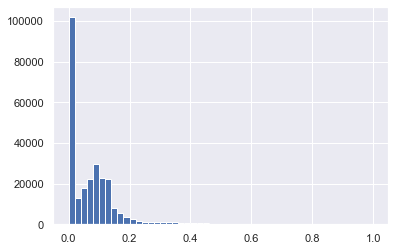

In [19]:
plt.hist(loan_data_defaults['recovery_rate'], bins=50)

(array([  166.,   646.,   198.,   984.,   819.,   675.,  1329.,   859.,
         1262.,  1530.,  1265.,  1758.,  1877.,  1810.,  2041.,  2309.,
         2344.,  2715.,  2889.,  2929.,  3282.,  3448.,  3723.,  3999.,
         4225.,  4432.,  4579.,  5300.,  5718.,  5669.,  6145.,  6663.,
         7155.,  7235.,  7826.,  8740.,  8914.,  9337.,  9573., 10058.,
        10694., 11187., 11157., 11638., 11950., 12949., 11756., 10811.,
         8619.,  5229.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

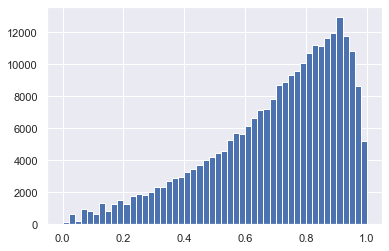

In [20]:
plt.hist(loan_data_defaults['CCF'], bins=50)

The density of proportion is best described as beta distribution. But we can't do beta regression in Python.

LGD: Two-stage approach
1. Model if recovery rate is equal to 0 or not -> Logistic Regression
2. If recovery rate is greater than 0, model how much it is -> Linear Regression

EAD: Multiple Linear Regression

In [21]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)

C:\Users\温泉小鱼汤\AppData\Local\Temp\ipykernel_10616\3193898076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)


In [22]:
loan_data_defaults['recovery_rate_0_1'] 

5040       0
25963      0
41393      0
55148      0
58105      0
          ..
2260633    0
2260638    1
2260640    0
2260654    0
2260655    0
Name: recovery_rate_0_1, Length: 262416, dtype: int32

# Save output

In [23]:
loan_data_defaults.to_csv(r'C:\Users\温泉小鱼汤\Documents\BaiduNetdiskWorkspace\USC\Credit Risk Modeling\loan_data_defaults.csv')

# Load output

In [24]:
loan_data_defaults = pd.read_csv(r'C:\Users\温泉小鱼汤\Documents\BaiduNetdiskWorkspace\USC\Credit Risk Modeling\loan_data_defaults.csv')

C:\Users\温泉小鱼汤\AppData\Local\Temp\ipykernel_10616\3809257988.py:1: DtypeWarning: Columns (21,49,57,114,125,126,127,130,131,132,135) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_defaults = pd.read_csv(r'C:\Users\温泉小鱼汤\Documents\BaiduNetdiskWorkspace\USC\Credit Risk Modeling\loan_data_defaults.csv')


# LGD Model

## LGD Model: Stage 1

### Splitting Data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = \
    train_test_split(loan_data_defaults.drop(['recovery_rate', 'recovery_rate_0_1', 'CCF'], axis = 1),
                     loan_data_defaults['recovery_rate_0_1'], 
                     test_size = 0.2, random_state = 42)

### Preparing the Inputs

 Include all categorical dummy and continuous variables that we will use as predictors. 

In [27]:
features_all = [
    'term_int',
    'emp_length_int',
    'mths_since_issue_d',
    'int_rate',
    'annual_inc',
    'mths_since_last_delinq',
    'grade:A',
    'grade:B',
    'grade:C',
    'grade:D',
    'grade:E',
    'grade:F',
    'grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'home_ownership:OWN',
    'home_ownership:MORTGAGE'
]

In [28]:
features_reference_cat = [
    'grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY'
]

In [29]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]

In [30]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis = 1)

### Estimating the Model

Build a Logistic Regression class with p values

In [31]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    # an instance of this class initialize is by inheriting from the original LogisticRegression class
    def __init__(self,*args,**kwargs): 
        self.model = linear_model.LogisticRegression(*args, **kwargs)
        
    # define a fit function which overrides the original fit available in the LogisticRegression class
    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [32]:
reg_lgd_st_1 = LogisticRegression_with_p_values()
reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)

In [33]:
feature_name = lgd_inputs_stage_1_train.columns.values

In [34]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
# add intercept
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()
# add p-values
p_values = reg_lgd_st_1.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.000357,NaN
1,term_int,-0.018107,0.000000e+00
2,emp_length_int,-0.000304,8.131200e-01
3,mths_since_issue_d,0.039681,0.000000e+00
4,int_rate,-0.001912,1.750699e-01
5,annual_inc,0.000001,6.802858e-25
6,mths_since_last_delinq,-0.000062,7.697776e-01
7,grade:A,-0.000200,9.944002e-01
8,grade:B,-0.000208,9.923623e-01
9,grade:C,-0.000069,9.975476e-01


### Testing the Model

In [35]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]

In [36]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(features_reference_cat, axis = 1)

In [37]:
y_hat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)
y_hat_test_lgd_stage_1

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)
y_hat_test_proba_lgd_stage_1

array([[0.49346203, 0.50653797],
       [0.56122857, 0.43877143],
       [0.30424884, 0.69575116],
       ...,
       [0.24305066, 0.75694934],
       [0.26905851, 0.73094149],
       [0.23028488, 0.76971512]])

In [39]:
# keep only proba > 0, which is column [1]
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[: ][: , 1]
y_hat_test_proba_lgd_stage_1

array([0.50653797, 0.43877143, 0.69575116, ..., 0.75694934, 0.73094149,
       0.76971512])

In [40]:
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test
lgd_targets_stage_1_test_temp.reset_index(drop = True, inplace = True)
lgd_targets_stage_1_test_temp

0        1
1        0
2        1
3        0
4        0
        ..
52479    1
52480    1
52481    0
52482    0
52483    1
Name: recovery_rate_0_1, Length: 52484, dtype: int64

In [41]:
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test_temp,
                                pd.DataFrame(y_hat_test_proba_lgd_stage_1)],
                                     axis = 1)
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test','y_hat_test_proba_lgd_stage_1']
df_actual_predicted_probs.index = lgd_inputs_stage_1_test.index

In [42]:
df_actual_predicted_probs.head()

,lgd_targets_stage_1_test,y_hat_test_proba_lgd_stage_1
72823,1,0.506538
4295,0,0.438771
58845,1,0.695751
241536,0,0.768089
3312,0,0.445680


### Estimating Accuracy of the Model

In [43]:
tr = 0.5
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)

In [44]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'],
            df_actual_predicted_probs['y_hat_test_lgd_stage_1'],
               rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,2898,14068
1,2005,33513


In [45]:
conf = pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'],
            df_actual_predicted_probs['y_hat_test_lgd_stage_1'],
    rownames = ['Actual'], colnames = ['Predicted'])/df_actual_predicted_probs.shape[0]
conf

Predicted,0,1
Actual,,
0,0.055217,0.268044
1,0.038202,0.638537


In [46]:
accuracy = conf.iloc[0,0] + conf.iloc[1,1]
accuracy

0.6937542870208063

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

In [48]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'],
                                 df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

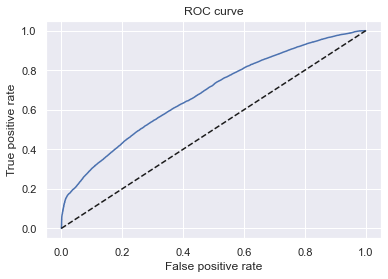

In [50]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [51]:
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'],
                      df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
AUROC

0.6794621013821895

It is more important to have a large proportion of correctly classified 1s than to have correctly classified 0s.

At the 2nd stage when we apply the linear regression model, some of the 1s may be estimated to have values of 0.

### Saving the Model

In [52]:
import pickle

In [53]:
pickle.dump(reg_lgd_st_1, open('lgd_model_stage_1.sav', 'wb')) #wb - write bytes

## LGD Model: Stage 2

In [54]:
# only work with data that has non-zero recovery rate
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]

### Splitting Data

In [55]:
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = \
    train_test_split(lgd_stage_2_data.drop(['recovery_rate', 'recovery_rate_0_1', 'CCF'], axis = 1),
                     lgd_stage_2_data['recovery_rate'], # target is recovery rate
                     test_size = 0.2, random_state = 42)

### Estimating the Model

In [56]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Build a Linear Regression class with p values

In [57]:
class LinearRegression(linear_model.LinearRegression):
    
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True, n_jobs=1, positive=False):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
        self.positive = positive
        
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [58]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]

In [59]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.drop(features_reference_cat, axis=1)

In [60]:
reg_lgd_st_2 = LinearRegression()
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression()

In [61]:
feature_name = lgd_inputs_stage_2_train.columns.values

In [62]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
# add intercept
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
summary_table = summary_table.sort_index()
# add p-values
p_values = reg_lgd_st_2.p
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.505734e-01,NaN
1,term_int,5.514812e-04,0.000000e+00
2,emp_length_int,2.469833e-04,1.947881e-04
3,mths_since_issue_d,-8.579569e-04,0.000000e+00
4,int_rate,-6.805455e-04,0.000000e+00
5,annual_inc,1.373376e-08,4.179631e-04
6,mths_since_last_delinq,-2.441614e-05,2.438734e-02
7,grade:A,-3.046037e-02,0.000000e+00
8,grade:B,-3.287654e-02,0.000000e+00
9,grade:C,-2.775769e-02,0.000000e+00


### Linear Regression Evaluation

In [63]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]

In [64]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test.drop(features_reference_cat, axis=1)

In [65]:
# get predicted values
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)

#### Correlation Check

In [66]:
# reset the index prior to concat
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test_temp.reset_index(drop=True)

Finding correlation between actual and predicted values

In [67]:
pd.concat([lgd_targets_stage_2_test_temp,
           pd.DataFrame(y_hat_test_lgd_stage_2)], axis=1).corr()

,recovery_rate,0
recovery_rate,1.000000,0.202276
0,0.202276,1.000000


 - The correlation is weak but satisfactory for a LGD model. If the correlation was too high, we would question our methodology.

#### Normality Check

Looking at the distribution between actual and predicted values

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='recovery_rate', ylabel='Density'>

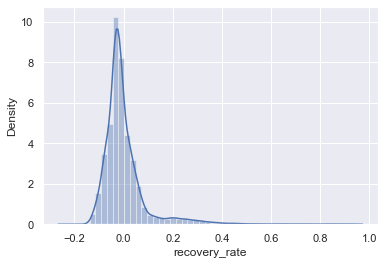

In [68]:
# plotting the residuals
sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)
# sns.distplot(lgd_targets_stage_2_test_temp - y_hat_test_lgd_stage_2)

- The distribution resembles a Normal distribution and most of the residuals are symmetrically distributed around 0

In [69]:
pickle.dump(reg_lgd_st_2, open('lgd_model_stage_2.sav', 'wb'))

## Combining Stage 1 and Stage 2

In [70]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)

In [71]:
y_hat_test_lgd_stage_2_all

array([0.12320107, 0.13090075, 0.1112523 , ..., 0.09361139, 0.10755605,
       0.091945  ])

LGD prediction is stage 1 prediction * stage 2 prediction

In [72]:
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all

In [73]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,52484.000000
mean,0.098377
std,0.035700
min,0.000000
25%,0.093674
50%,0.108684
75%,0.119393
max,0.229705


In [74]:
# cap lgd prediction between 0 to 1
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)

# EAD Model

## Estimation and Interpretation

In [75]:
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = \
    train_test_split(loan_data_defaults.drop(['recovery_rate', 
                                              'recovery_rate_0_1', 
                                              'CCF'], axis = 1),
                     loan_data_defaults['CCF'], 
                     test_size = 0.2, random_state = 42)                                                                                    

In [76]:
ead_inputs_train.columns.values

array(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'member_id', 'loan_amnt',
       'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_join

In [77]:
ead_inputs_train = ead_inputs_train[features_all]

In [78]:
ead_inputs_train = ead_inputs_train.drop(features_reference_cat, axis = 1)

In [79]:
reg_ead = LinearRegression()
reg_ead.fit(ead_inputs_train, ead_targets_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression()

In [80]:
feature_name = ead_inputs_train.columns.values

In [81]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
# add intercept
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
# add p-values
p_values = reg_ead.p
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,4.580041e-01,NaN
1,term_int,4.607010e-03,0.000000e+00
2,emp_length_int,-1.527948e-03,0.000000e+00
3,mths_since_issue_d,-3.356322e-03,0.000000e+00
4,int_rate,1.010876e-02,0.000000e+00
5,annual_inc,4.216789e-08,3.546787e-10
6,mths_since_last_delinq,-2.231608e-04,0.000000e+00
7,grade:A,2.921558e-02,0.000000e+00
8,grade:B,2.334898e-02,0.000000e+00
9,grade:C,2.350600e-02,0.000000e+00


Higher CCF indicates higher amount of exposure to default.

## Model Validation

In [82]:
ead_inputs_test = ead_inputs_test[features_all]

In [83]:
ead_inputs_test = ead_inputs_test.drop(features_reference_cat, axis = 1)

In [84]:
y_hat_test_ead = reg_ead.predict(ead_inputs_test)

### Correlation Check

In [85]:
ead_targets_test_temp = ead_targets_test
ead_targets_test_temp = ead_targets_test_temp.reset_index(drop = True)

In [86]:
# getting correlations
pd.concat([ead_targets_test_temp,
           pd.DataFrame(y_hat_test_ead)], axis = 1).corr()

,CCF,0
CCF,1.000000,0.464911
0,0.464911,1.000000


Moderate positive correlation between actual and predicted values. Good for an EAD model.

### Normality Check

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCF', ylabel='Density'>

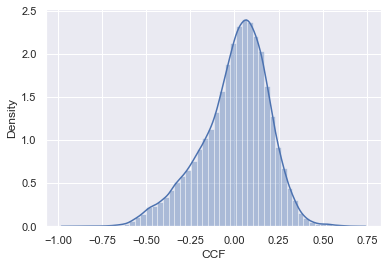

In [87]:
# plotting the residuals
sns.distplot(ead_targets_test - y_hat_test_ead)

The distribution resembles a normal distribution. Most of the residuals are symmetrically distributed around 0.

### Cap Predicted Values [0, 1]

In [88]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,52484.000000
mean,0.698227
std,0.103053
min,0.270757
25%,0.626167
50%,0.694267
75%,0.768303
max,1.028601


In [89]:
y_hat_test_ead = np.where(y_hat_test_ead < 0, 0, y_hat_test_ead)
y_hat_test_ead = np.where(y_hat_test_ead > 1, 1, y_hat_test_ead)

In [90]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,52484.000000
mean,0.698222
std,0.103038
min,0.270757
25%,0.626167
50%,0.694267
75%,0.768303
max,1.000000


# Calculate Expected Loss

In [91]:
loan_data_preprocessed.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,...,0,0,0,0,0,0,0,0,0,1
1,1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,...,0,0,0,0,0,0,0,0,0,1
2,2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,...,0,0,0,0,0,0,0,0,0,1
3,3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,...,0,0,0,0,1,0,0,0,0,1
4,4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,...,0,0,0,0,0,0,0,0,0,1


## Independent Variables

### Impute missing values

In the PD model we created Missing categories for missing values. Here we impute them with 0.

In [92]:
loan_data_preprocessed['mths_since_last_delinq'].fillna(0, inplace = True)

In [93]:
loan_data_preprocessed['mths_since_last_record'].fillna(0, inplace = True)

### Create dummy variables

In [94]:
loan_data_preprocessed['home_ownership:RENT_OTHER_NONE_ANY'] = sum([loan_data_preprocessed['home_ownership:RENT'],
                                                    loan_data_preprocessed['home_ownership:OTHER'],
                                                    loan_data_preprocessed['home_ownership:NONE'],
                                                    loan_data_preprocessed['home_ownership:ANY']])

## Predict LGD

In [95]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed[features_all]

In [96]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed_lgd_ead.drop(features_reference_cat, axis = 1)

In [97]:
loan_data_preprocessed['recovery_rate_st_1'] = reg_lgd_st_1.model.predict(loan_data_preprocessed_lgd_ead)

In [98]:
loan_data_preprocessed['recovery_rate_st_2'] = reg_lgd_st_2.predict(loan_data_preprocessed_lgd_ead)

In [99]:
loan_data_preprocessed['recovery_rate'] = loan_data_preprocessed['recovery_rate_st_1'] * loan_data_preprocessed['recovery_rate_st_2']

In [100]:
loan_data_preprocessed['recovery_rate'] = np.where (loan_data_preprocessed['recovery_rate'] < 0, 0, loan_data_preprocessed['recovery_rate'])
loan_data_preprocessed['recovery_rate'] = np.where (loan_data_preprocessed['recovery_rate'] > 1, 1, loan_data_preprocessed['recovery_rate'])

In [101]:
loan_data_preprocessed['LGD'] = 1 - loan_data_preprocessed['recovery_rate']

In [102]:
loan_data_preprocessed['LGD'].describe()

count    2.260668e+06
mean     9.255064e-01
std      5.153993e-02
min      0.000000e+00
25%      8.846040e-01
50%      9.000973e-01
75%      1.000000e+00
max      1.000000e+00
Name: LGD, dtype: float64

## Predict EAD

In [103]:
loan_data_preprocessed['CCF'] = reg_ead.predict(loan_data_preprocessed_lgd_ead)

In [104]:
loan_data_preprocessed['CCF'] = np.where (loan_data_preprocessed['CCF'] < 0, 0, loan_data_preprocessed['CCF'])
loan_data_preprocessed['CCF'] = np.where (loan_data_preprocessed['CCF'] > 1, 1, loan_data_preprocessed['CCF'])

In [105]:
loan_data_preprocessed['EAD'] = loan_data_preprocessed['CCF'] * loan_data_preprocessed['funded_amnt']

In [106]:
loan_data_preprocessed['EAD'].describe()

count    2.260668e+06
mean     1.072904e+04
std      7.237126e+03
min      1.398297e+02
25%      5.086949e+03
50%      8.952358e+03
75%      1.468218e+04
max      4.000000e+04
Name: EAD, dtype: float64

## Predict PD

Import the split data and merge them

In [107]:
loan_data_inputs_train = pd.read_csv(r'C:\Users\温泉小鱼汤\Documents\BaiduNetdiskWorkspace\USC\Credit Risk Modeling\loan_data_X_train.csv')
loan_data_inputs_test = pd.read_csv(r'C:\Users\温泉小鱼汤\Documents\BaiduNetdiskWorkspace\USC\Credit Risk Modeling\loan_data_X_test.csv')

C:\Users\温泉小鱼汤\AppData\Local\Temp\ipykernel_10616\109877312.py:1: DtypeWarning: Columns (124,125,126,129,130,131,134) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_inputs_train = pd.read_csv(r'C:\Users\温泉小鱼汤\Documents\BaiduNetdiskWorkspace\USC\Credit Risk Modeling\loan_data_X_train.csv')


In [108]:
loan_data_inputs_pd = pd.concat([loan_data_inputs_train, loan_data_inputs_test], 
                                axis = 0) # concat by the row: axis = 0

In [109]:
loan_data_inputs_pd.shape

(2260668, 334)

In [110]:
loan_data_inputs_pd.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,annual_inc:101k-111k,annual_inc:111k-131k,annual_inc:131k-161k,annual_inc:>161k,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-15,mths_since_last_delinq:16-31,mths_since_last_delinq:32-81,mths_since_last_delinq:>82
0,305053,NaN,NaN,14600,14600,14600.0,36 months,21.85,556.45,D,...,0,0,0,0,1,0,0,0,0,0
1,50247,NaN,NaN,10000,10000,10000.0,60 months,13.56,230.41,C,...,0,0,0,0,1,0,0,0,0,0
2,1630001,NaN,NaN,20000,20000,20000.0,36 months,12.74,671.38,C,...,0,1,0,0,0,0,0,1,0,0
3,927626,NaN,NaN,8000,8000,8000.0,36 months,13.49,271.45,C,...,0,0,0,0,0,0,0,1,0,0
4,758488,NaN,NaN,30000,30000,30000.0,36 months,11.99,996.29,C,...,0,0,0,0,1,0,0,0,0,0


In [111]:
# restore the orginal index prior to the train test split
loan_data_inputs_pd = loan_data_inputs_pd.set_index('Unnamed: 0')

In [112]:
loan_data_inputs_pd.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,annual_inc:101k-111k,annual_inc:111k-131k,annual_inc:131k-161k,annual_inc:>161k,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-15,mths_since_last_delinq:16-31,mths_since_last_delinq:32-81,mths_since_last_delinq:>82
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
305053,NaN,NaN,14600,14600,14600.0,36 months,21.85,556.45,D,D5,...,0,0,0,0,1,0,0,0,0,0
50247,NaN,NaN,10000,10000,10000.0,60 months,13.56,230.41,C,C1,...,0,0,0,0,1,0,0,0,0,0
1630001,NaN,NaN,20000,20000,20000.0,36 months,12.74,671.38,C,C1,...,0,1,0,0,0,0,0,1,0,0
927626,NaN,NaN,8000,8000,8000.0,36 months,13.49,271.45,C,C2,...,0,0,0,0,0,0,0,1,0,0
758488,NaN,NaN,30000,30000,30000.0,36 months,11.99,996.29,C,C1,...,0,0,0,0,1,0,0,0,0,0


In [113]:
features_all_pd = [
    'term:36',
    'term:60',
    'emp_length:0',
    'emp_length:1',
    'emp_length:2-6',
    'emp_length:7-9',
    'emp_length:10',
    'mths_since_issue_d:<4',
    'mths_since_issue_d:4-6',
    'mths_since_issue_d:7-9',
    'mths_since_issue_d:10-12',
    'mths_since_issue_d:13-14',
    'mths_since_issue_d:15-17',
    'mths_since_issue_d:18-23',
    'mths_since_issue_d:24-28',
    'mths_since_issue_d:29-58',
    'mths_since_issue_d:59-75',
    'mths_since_issue_d:76-86',
    'mths_since_issue_d:87-125',
    'mths_since_issue_d:>126',
    'int_rate:<7.878',
    'int_rate:7.878-10.96',
    'int_rate:10.96-13.014',
    'int_rate:13.014-15.068',
    'int_rate:15.068-20.718',
    'int_rate:>20.718',
    'annual_inc:<10k',
    'annual_inc:10k-45k',
    'annual_inc:45k-55k',
    'annual_inc:55k-60k',
    'annual_inc:60k-70k',
    'annual_inc:70k-85k',
    'annual_inc:85k-101k',
    'annual_inc:101k-111k',
    'annual_inc:111k-131k',
    'annual_inc:131k-161k',
    'annual_inc:>161k',
    'mths_since_last_delinq:Missing',
    'mths_since_last_delinq:0-3',
    'mths_since_last_delinq:4-15',
    'mths_since_last_delinq:16-31',
    'mths_since_last_delinq:32-81',
    'mths_since_last_delinq:>82',
    'grade:A',
    'grade:B',
    'grade:C',
    'grade:D',
    'grade:E',
    'grade:F',
    'grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'home_ownership:OWN',
    'home_ownership:MORTGAGE',
    'addr_state:NV_NM_HI_SD',
    'addr_state:MO_MD_NC',
    'addr_state:PA_KY_TN',
    'addr_state:NJ_MI_IN',
    'addr_state:VA_MN_AK',
    'addr_state:AZ_NE_OH',
    'addr_state:DE_MA_UT_WI',
    'addr_state:GA_RI_WY_IL_MT_KS'
]

In [114]:
ref_categories_pd = [
    'term:60',
    'emp_length:0',
    'mths_since_issue_d:>126',
    'int_rate:>20.718',
    'annual_inc:10k-45k',
    'mths_since_last_delinq:0-3',
    'grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'addr_state:NV_NM_HI_SD' 
]

In [115]:
loan_data_inputs_pd_temp = loan_data_inputs_pd[features_all_pd]

In [116]:
loan_data_inputs_pd_temp = loan_data_inputs_pd_temp.drop(ref_categories_pd, axis = 1)

In [117]:
loan_data_inputs_pd_temp.shape

(2260668, 52)

In [118]:
import pickle

In [119]:
reg_pd = pickle.load(open('pd_model.sav', 'rb'))

In [120]:
# predict_proba[0] gives good_or_bad = 0, which is default
reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0] # all lists, all rows, 1st col

array([0.08071551, 0.00716024, 0.08271467, ..., 0.03074793, 0.0695608 ,
       0.12983947])

In [121]:
loan_data_inputs_pd['PD'] = reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]

In [122]:
loan_data_inputs_pd['PD'].head()

Unnamed: 0
305053     0.080716
50247      0.007160
1630001    0.082715
927626     0.147369
758488     0.134851
Name: PD, dtype: float64

In [123]:
loan_data_inputs_pd['PD'].describe()

count    2.260668e+06
mean     1.257134e-01
std      9.907354e-02
min      6.319857e-04
25%      4.488378e-02
50%      1.068106e-01
75%      1.829413e-01
max      6.031965e-01
Name: PD, dtype: float64

## Calculate EL

In [124]:
loan_data_preprocessed_new = pd.concat([loan_data_preprocessed, loan_data_inputs_pd], axis = 1)

In [130]:
# loan_data_preprocessed_new.to_csv(r'C:\Users\温泉小鱼汤\Documents\BaiduNetdiskWorkspace\USC\Credit Risk Modeling\loan_data_preprocessed_new.csv')

In [3]:
# loan_data_preprocessed_new = pd.read_csv(r'C:\Users\温泉小鱼汤\Documents\BaiduNetdiskWorkspace\USC\Credit Risk Modeling\loan_data_preprocessed_new.csv')

C:\Users\温泉小鱼汤\AppData\Local\Temp\ipykernel_22620\2094378402.py:1: DtypeWarning: Columns (21,49,57,114,125,126,127,130,131,132,135,141,142,143,306,334,342,399,410,411,412,415,416,417,420,426,427,428) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_preprocessed_new = pd.read_csv(r'C:\Users\温泉小鱼汤\Documents\BaiduNetdiskWorkspace\USC\Credit Risk Modeling\loan_data_preprocessed_new.csv')


In [4]:
loan_data_preprocessed_new['EL'] = loan_data_preprocessed_new['PD'] * \
                                   loan_data_preprocessed_new['LGD'] * \
                                   loan_data_preprocessed_new['EAD']

In [5]:
loan_data_preprocessed_new['EL'].describe()

count    2.260668e+06
mean     1.250054e+03
std      1.512319e+03
min      0.000000e+00
25%      2.696890e+02
50%      6.888067e+02
75%      1.644605e+03
max      1.759134e+04
Name: EL, dtype: float64

In [11]:
loan_data_preprocessed_new[['funded_amnt', 'PD', 'LGD', 'EAD', 'EL']].sample(5)

,funded_amnt,PD,LGD,EAD,EL
1380436,6000,0.115776,0.889790,4091.403991,421.480298
1763202,12000,0.106263,0.921570,6527.870994,639.264662
1401120,35000,0.121933,1.000000,29150.599974,3554.406480
1026530,10000,0.142836,0.901533,6109.037987,786.667354
890657,10000,0.140981,0.882287,6907.836279,859.234165


In [12]:
loan_data_preprocessed_new['EL'].sum() / loan_data_preprocessed_new['funded_amnt'].sum()

0.08310610745139617